# 利用大頭貼辨識身高

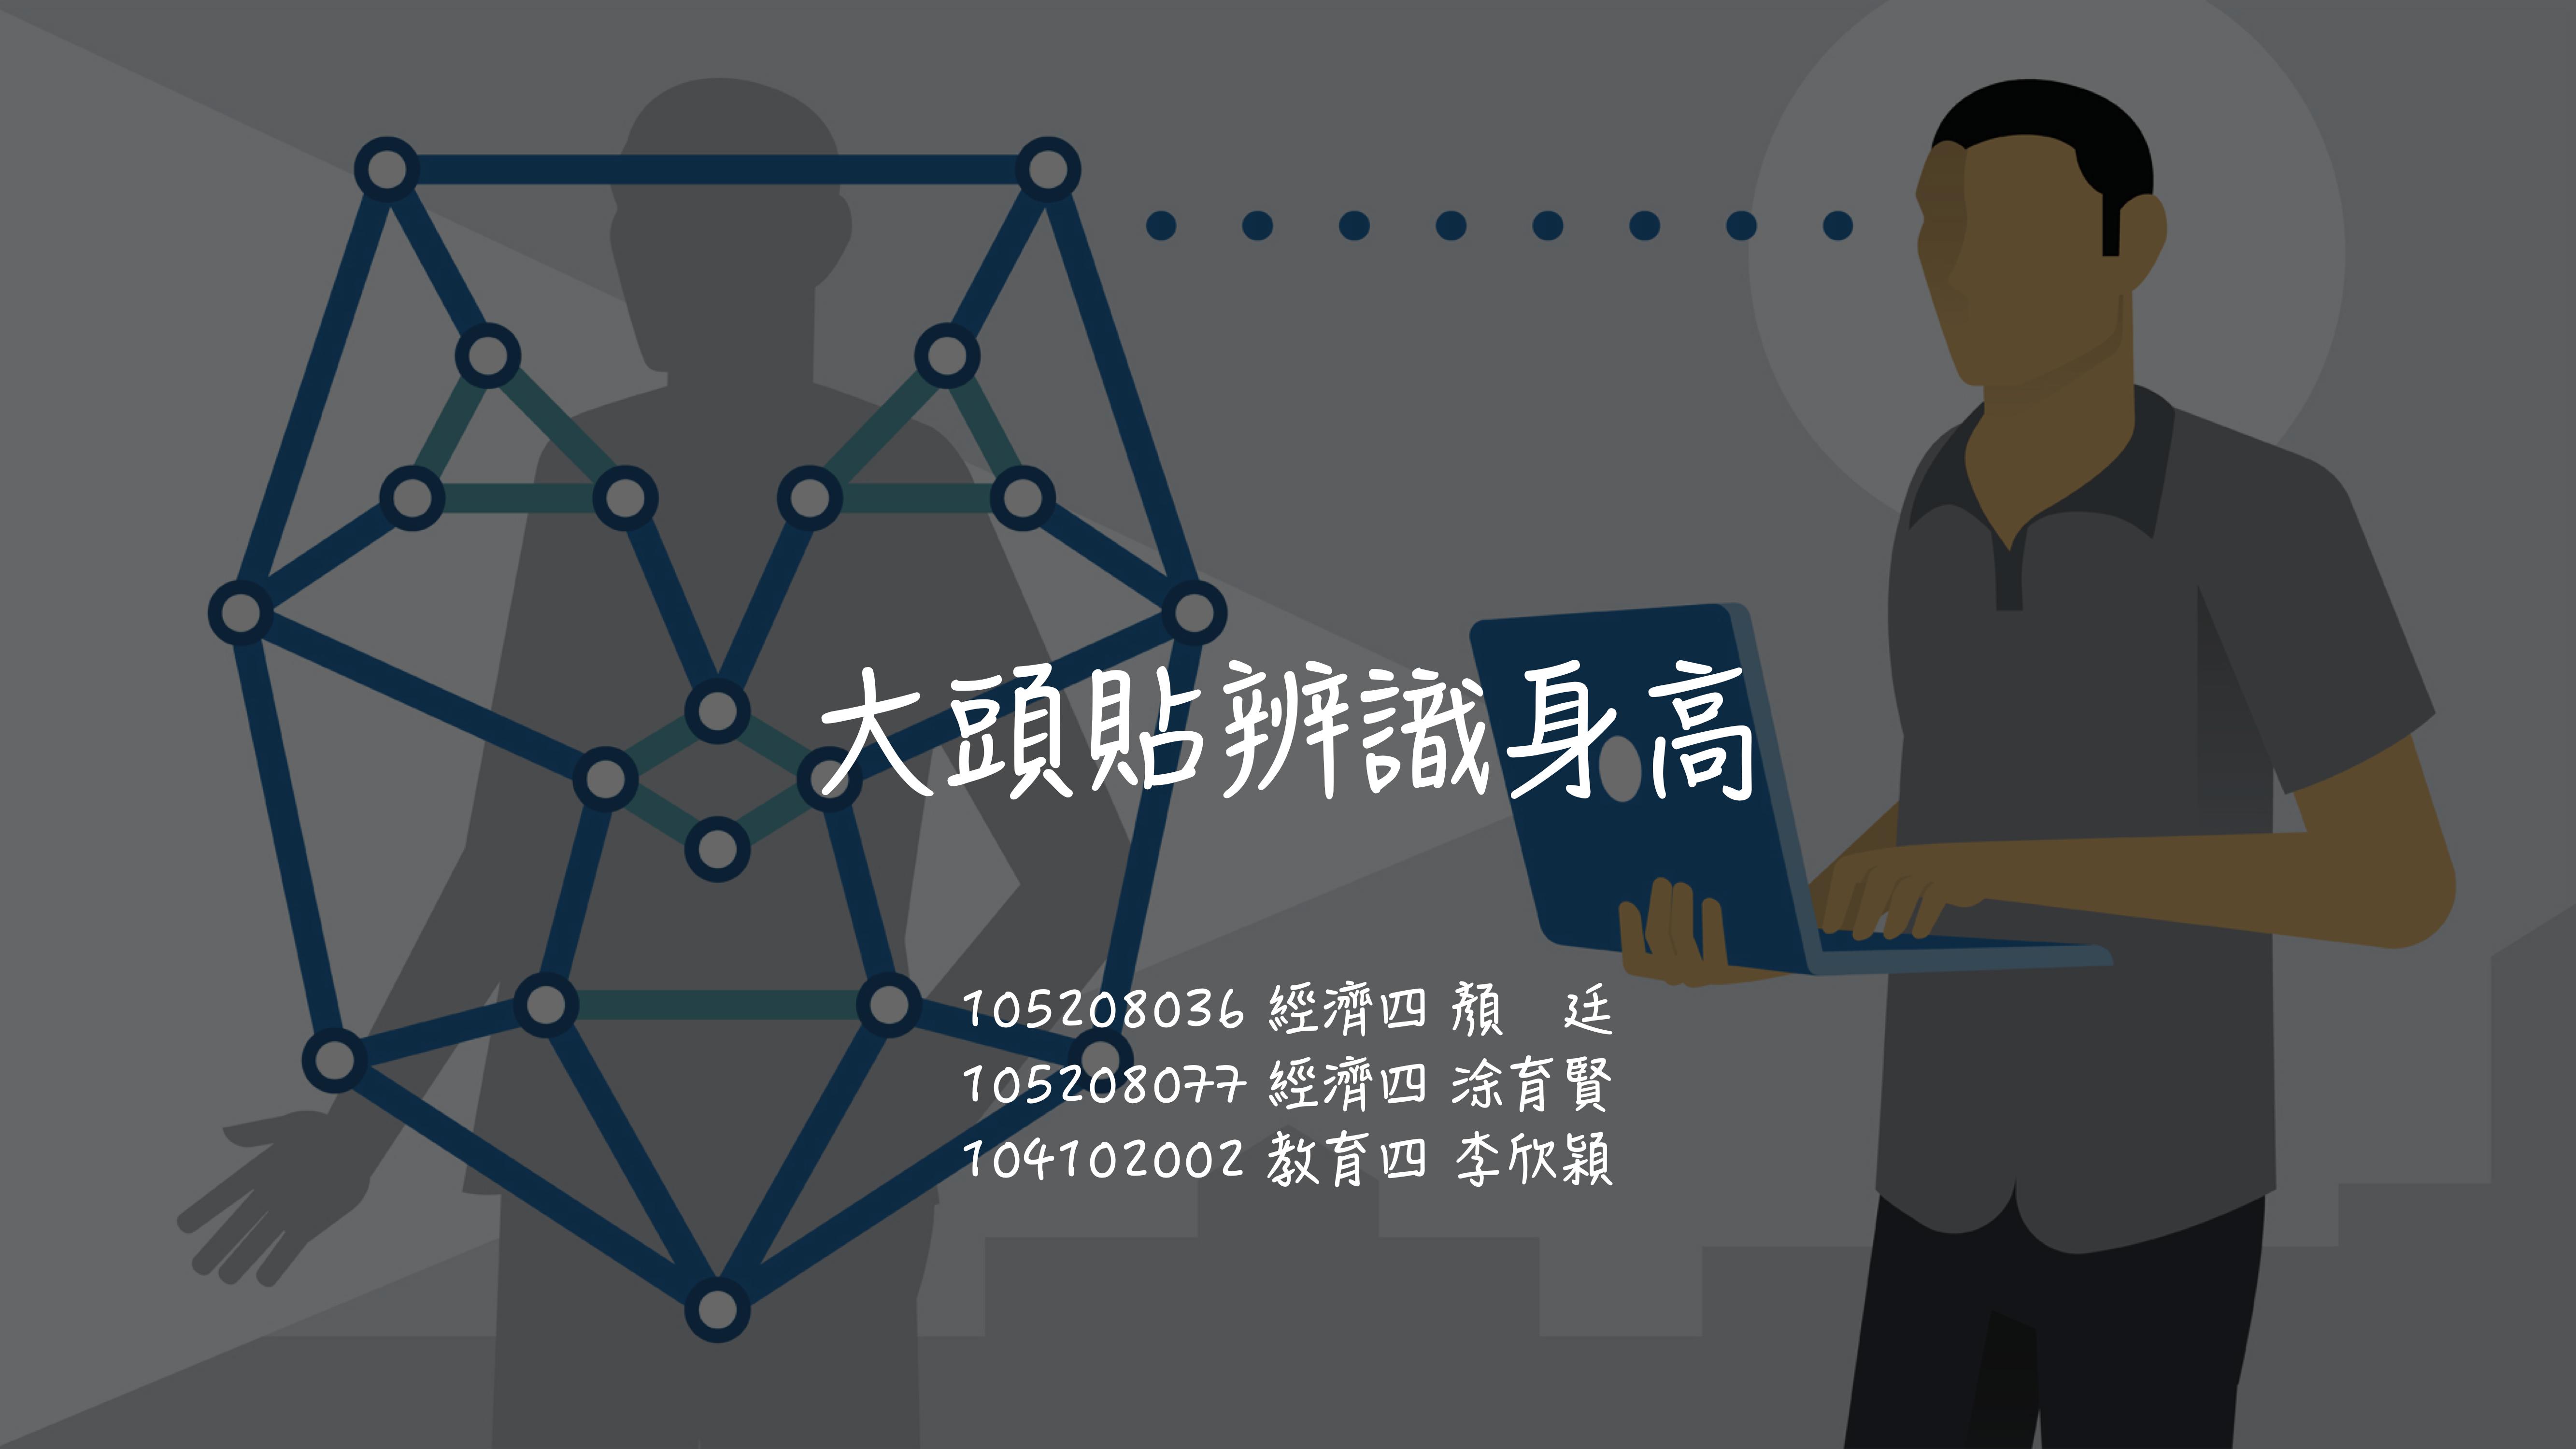

# 組員

105208036 經濟四 顏廷（建模、報告）  
105208077 經濟四 涂育賢（爬蟲、建模、程式碼統整、報告）  
104102002 教育四 李欣穎（爬蟲、建模、報告）

# 目錄

1. 研究動機
2. 專案介紹
3. 實作思路
4. 數據來源
5. 照片清理
6. 模型介紹
7. 未來應用

## 1. 研究動機

一直以來有一個說法：**長得高的人看起來臉比較長。**

從生物學的角度來看，長得高的人是因為生長激素分泌比較多。生長激素主要刺激骨頭兩端的軟骨生長，從而增加骨頭的長度，
下頜和顱骨也有軟骨，受生長激素影響，所以外觀表現為下頜較長。

## 2. 專案介紹

我們想要透過這次實作來驗證這一件事，如果發現有兩者之間有相關聯，我們希望能內嵌訓練好的辨識模型到需要放照片的社交軟體中，抑或是吃到飽餐廳即時辨識兒童身高、遊樂園設施身高限制系統、警察特考招募系統等應用上。

## 3. 實作思路

3.1 透過爬蟲取得超過一萬張**個人大頭照**及**身高資訊**  
3.2 利用**CNN**、**fastAI**、**OpenCV**模型進行預測，分別進行：  
&emsp;&emsp;3.2.1 臉部特徵擷取，透過臉部特徵數據預測相對應的身高並與真實數據做對比  
&emsp;&emsp;3.2.2 直接透過照片去預測身高  
3.3 篩選模型、調整參數  
3.4 預測結果

## 4. 數據來源

### 爬蟲部分
以下是由 **李欣穎** 組員負責的爬蟲程式碼  
網址：https://github.com/tuyuxian/1082-AI-python/blob/master/code0.ipynb  
目標網站：https://celebsheight.org

以下是由 **涂育賢** 組員負責的爬蟲程式碼  
網址：https://github.com/tuyuxian/1082-AI-python/blob/master/code1.ipynb  
目標網站：http://www.7k7k.net.cn/star/  

### 資料集描述

亞洲名人照片：共**3550**張  
歐美名人照片：共**7000**張  
身高區間：150cm ~ 195cm

## 5. 照片清理

使用 **haarcascade_frontalface_default.xml**  
臉部擷取處理程式碼  
網址：https://github.com/tuyuxian/1082-AI-python/blob/master/FaceExtract.ipynb

#### 範例

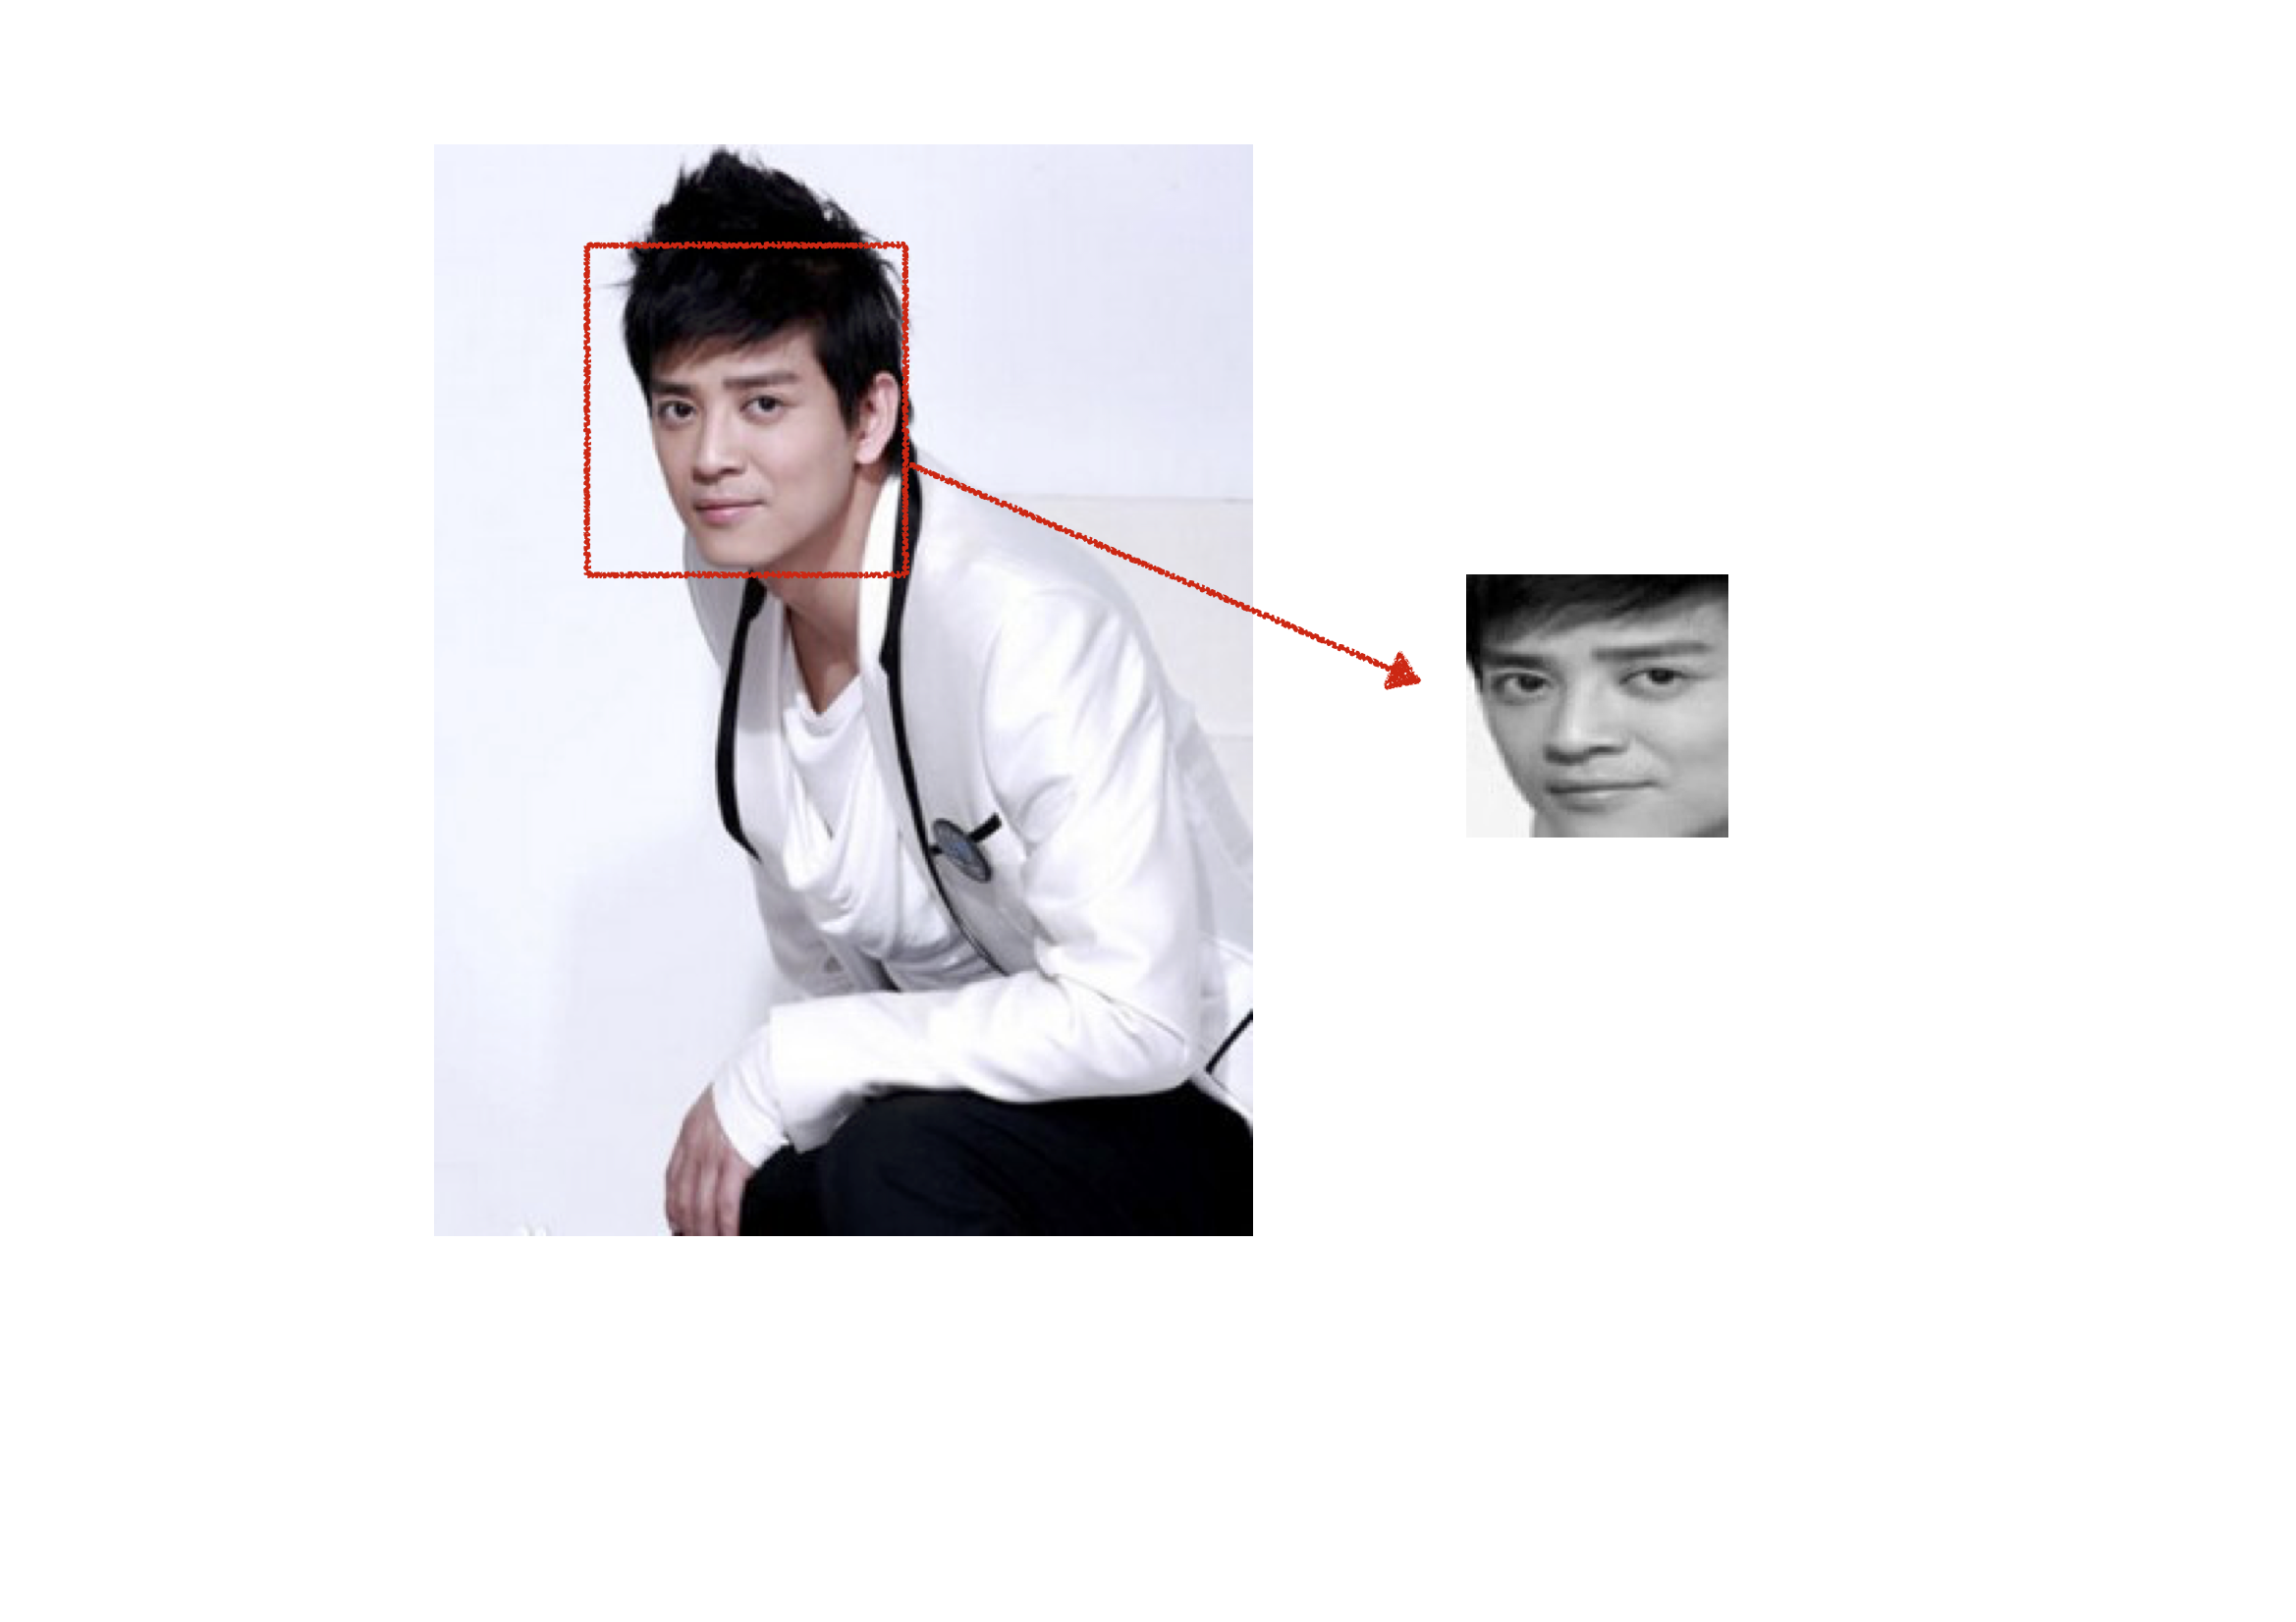

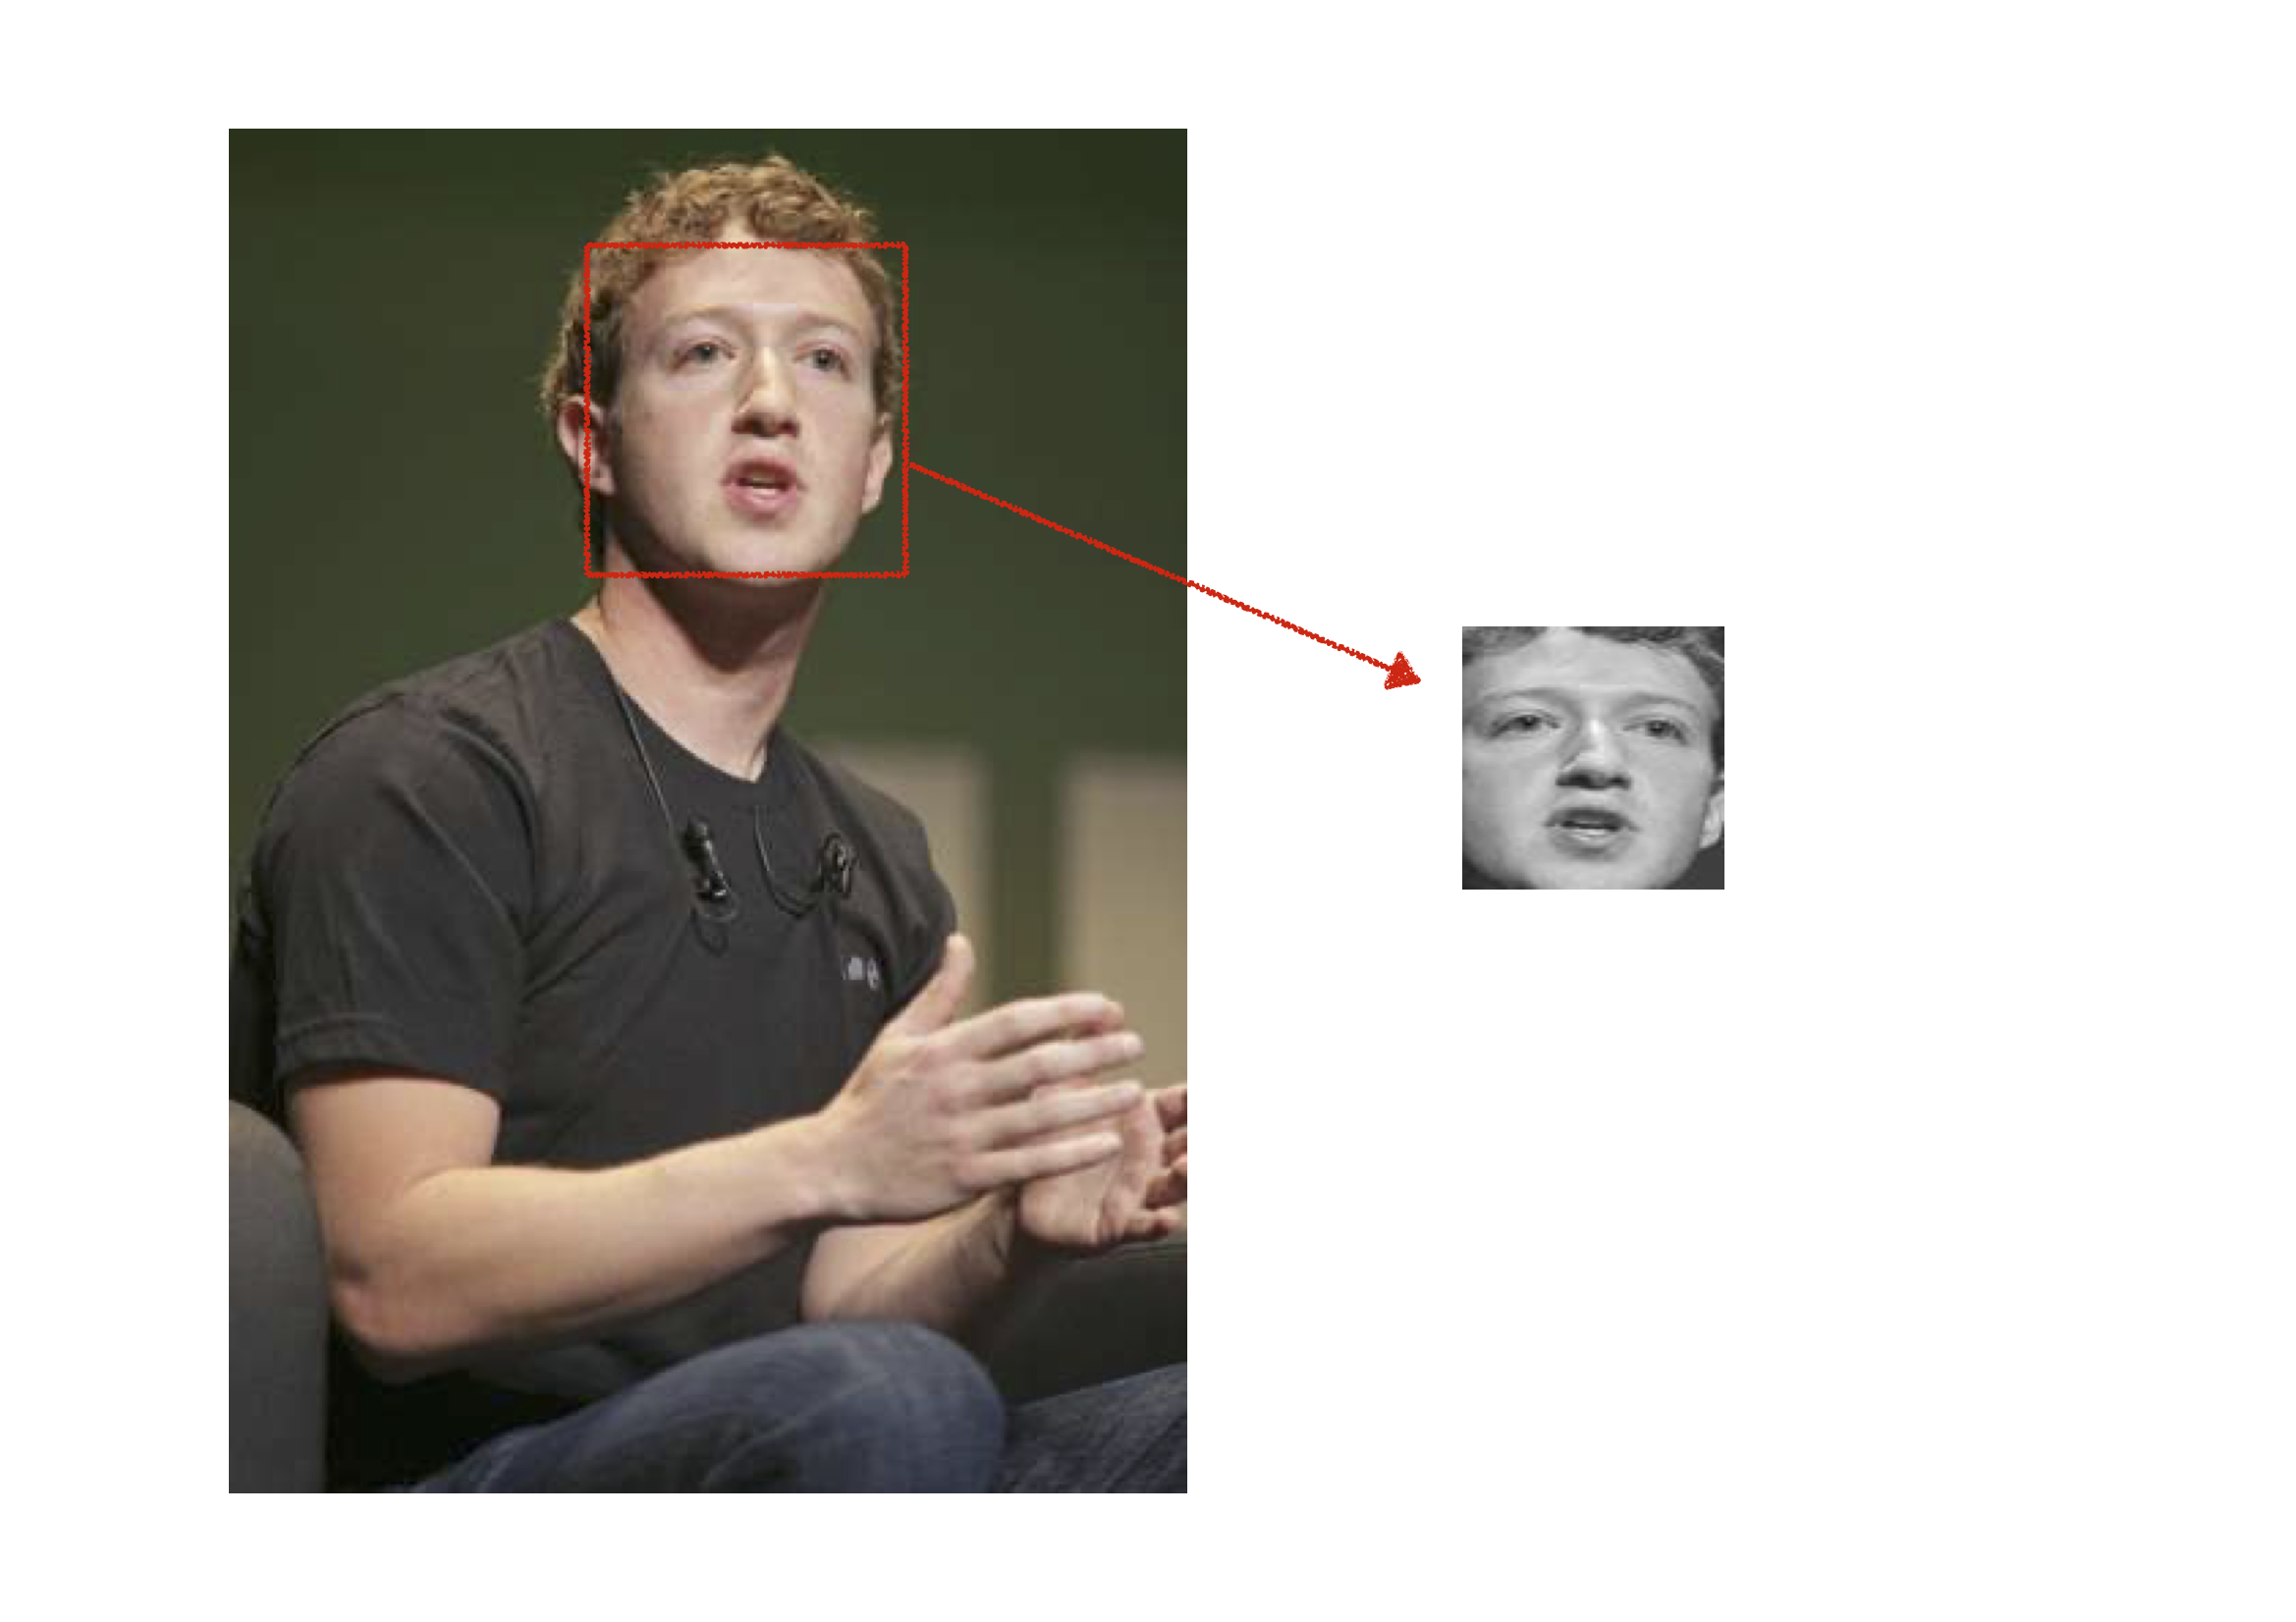

## 6.模型介紹

預測身高的部分我們將分為兩部分進行，分別是：
1. 利用現成的模型**fastAI**來預測身高。 （執行組員：**顏廷**、**李欣穎**）
2. 透過CNN模型**找出人臉特徵點**，進一步利用這些特徵點使用NN模型來預測身高。 （執行組員：**涂育賢**）  

## fastai




**顏廷**：亞洲名人身高預測（準確率：**42**%）  
擷取照片中出現的臉部，並餵入fastai，後續將結果視覺化及加上自己的insight。  
程式碼網址：https://github.com/yentim0519/junyi/blob/master/height_prediction.ipynb?fbclid=IwAR2GZenV-NIQLOh23nvr6u49f1s8Yq3_sP9ocqLR7Igi0YwWnqYhcAM81dU  


**李欣穎**：歐美名人身高預測（準確率：**35**%）  
將照片餵入fastai，後續將結果視覺化及加上朋友的照片做測試。  
程式碼網址：https://colab.research.google.com/drive/1gS51HHJFj4nls_iP7NMatSCRR3xMOB0t?fbclid=IwAR30Nau36w3VEf5RadRK7AkdP8RwyhzHITT15WzKtOTBYr09hYyWD-LjEhA


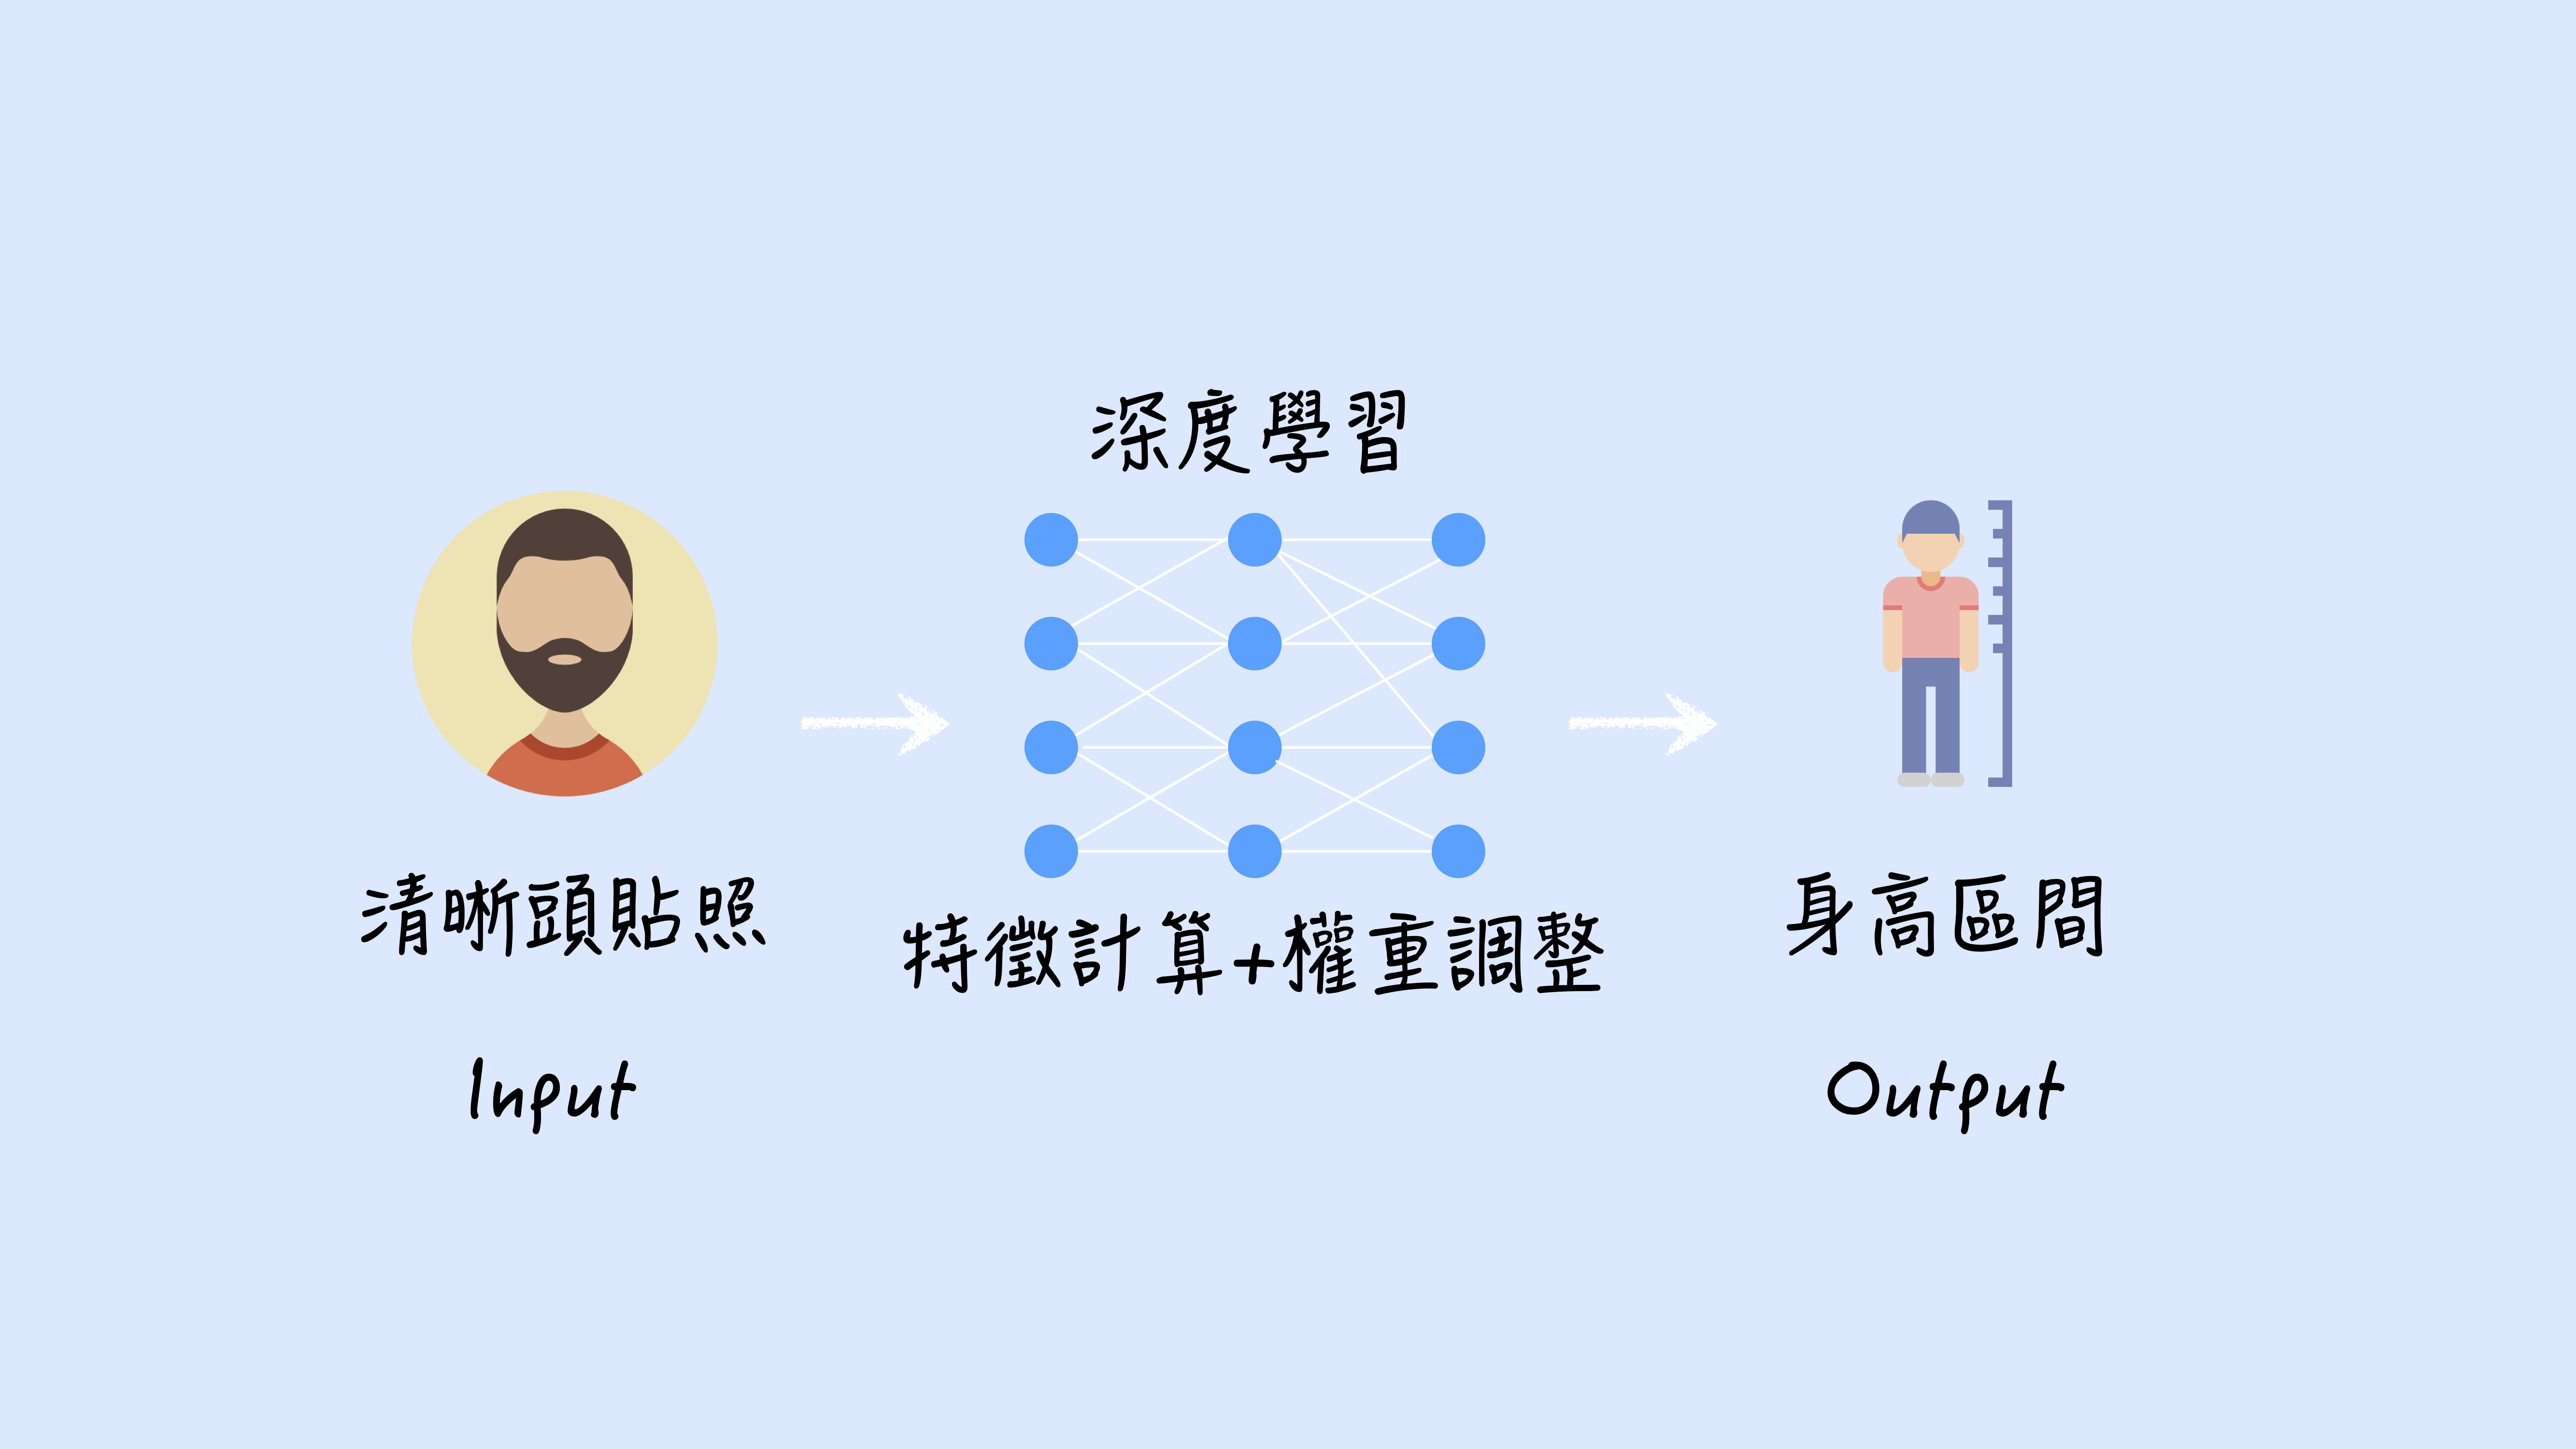

## CNN + NN
### 第一階段 - 特徵計算

藉由 **Kaggle facial keypoint detection** 資料集與高手提供的模型參數來作為我們標註人臉特徵的方式。  
參考網址：https://www.kaggle.com/karanjakhar/facial-keypoint-detection/output



利用kaggle資料集訓練的部分，由**涂育賢**組員在GCP上進行。

In [1]:
from keras.layers import Conv2D, Dropout, Dense, Flatten
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D, MaxPool2D, ZeroPadding2D
from keras.models import Sequential, Model
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96, 96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])


model = Sequential()

model.add(Convolution2D(32, (3, 3), padding='same',
          use_bias=False, input_shape=(96, 96, 1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3, 3), padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()


model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

#model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.2)

Using TensorFlow backend.



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)      

#### 載入在GCP上訓練好的模型

模型下載網址：https://drive.google.com/drive/folders/1DtpRPmTsSm3L5364on4ayi0nXQ1gY2nU?usp=sharing  

In [2]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

try:
    with open("face_feature_detection.json", "r") as text_file:
        json_string = text_file.read()
        model_CNN = Sequential()
        model_CNN = model_from_json(json_string)
        model_CNN.load_weights("face_feature_detection_weights.h5", by_name=False)
except:
    print('Model not in the correct path!')

#### 載入照片

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import re

# 載入亞洲名人照片
def load_pic():
    people = [person for person in os.listdir(
        '/Users/samtu/Desktop/deepL/face/')]
    people.remove('.DS_Store')
    people.sort(key=lambda x: int(x[:-5]))

    image_lst = []
    for image in tqdm(people):
        img = cv2.imread('/Users/samtu/Desktop/deepL/face/%s' %
                         (image), cv2.IMREAD_GRAYSCALE)
        image_lst.append((image, img))

    photo_lst = []
    for p in tqdm(image_lst):
        for i in p[1]:
            i = list(i)
            img = [x for x in i]
            photo_lst.append(img)

    photo = np.array(photo_lst, dtype='float')
    X_train = photo.reshape(-1, 96, 96, 1)
    
    return X_train, image_lst

# 載入歐美名人照片
def load_pic1():
    people = [person for person in os.listdir(
        '/Users/samtu/Desktop/deepL/foreign_face/')]
    people.remove('.DS_Store')

    image_lst1 = []
    for image in tqdm(people):
        img = cv2.imread('/Users/samtu/Desktop/deepL/foreign_face/%s' %
                         (image), cv2.IMREAD_GRAYSCALE)
        image_lst1.append((image, img))

    photo_lst = []
    for p in tqdm(image_lst1):
        for i in p[1]:
            i = list(i)
            img = [x for x in i]
            photo_lst.append(img)

    photo = np.array(photo_lst, dtype='float')
    X_train1 = photo.reshape(-1, 96, 96, 1)
    
    return X_train1, image_lst1

In [4]:
X_train, image_lst = load_pic()
X_train1, image_lst1 = load_pic1()

100%|██████████| 5878/5878 [00:08<00:00, 710.40it/s] 


亞洲名人照片資料集原有3550張，經清理臉部辨識失敗的照片後變為**2850**張。  
歐美名人照片資料集原有7000張，經清理臉部辨識失敗的照片後變為**5878**張。  

#### 預測

In [5]:
predict = model_CNN.predict(X_train)
predict1 = model_CNN.predict(X_train1)

In [6]:
def face_feature_detection_check(n):
    plt.imshow(X_train[n].reshape(96, 96), cmap='gray')
    plt.scatter([predict[n][x] for x in range(0, len(predict[n]), 2)], [
                predict[n][x] for x in range(1, len(predict[n]), 2)], s=25, c='r')

輸入照片編號（最大值：2849）:100


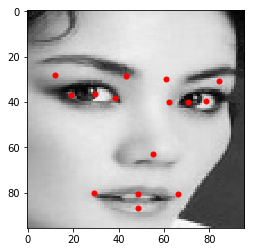

In [7]:
n = input('輸入照片編號（最大值：2849）:')
face_feature_detection_check(int(n))

#### 訓練、測試集處理

In [8]:
def dataset_asian(predict,image_lst):
    from keras.utils import to_categorical

    feature_lst = list(predict)
    info = pd.read_csv('/Users/samtu/Desktop/deepL/info.csv', sep=',')

    img_index = info['index']
    image_feature = []
    for i in range(len(image_lst)):
        image_feature.append([image_lst[i][0].strip('.jpeg'), predict[i]])

    image_index = []
    image_name = []
    height = []
    feature_point = []
    for i in image_feature:
        num = int(i[0])
        if num in img_index:
            feature_point.append(i[1])
            image_name.append(info['name'][num])
            image_index.append(info['index'][num])
            height.append(info['height'][num])

    image_index = pd.Series(image_index, name='index')
    image_name = pd.Series(image_name, name='name')
    height = pd.Series(height, name='height')
    feature_point = pd.Series(feature_point, name='facial feature')
    image_info = pd.concat([image_index, image_name, height, feature_point], axis=1)
    image_info = image_info[~(image_info['height'] == 'N')]

    x = [x for x in image_info['facial feature']]
    x = np.array(x, dtype='float')
    y = np.array(image_info['height'], dtype='float')

    y_group = []
    for h in y:
        if h < 160:
            y_group.append(0)
        elif h >= 160 and h < 170:
            y_group.append(1)
        elif h >= 170 and h < 180:
            y_group.append(2)
        elif h >= 180 and h < 190:
            y_group.append(3)
        elif h >= 190:
            y_group.append(4)

    y_group = np.array(y_group, dtype='float')

    # train:test = 7:3
    x_train, x_test = x[:1910], x[1910:]
    y_train, y_test = y_group[:1910], y_group[1910:]

    x_train = x_train/96 #normalization
    x_test = x_test/96 #normalization

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return x_train, x_test, y_train, y_test

def dataset_foreign(predict1, image_lst1):
    from keras.utils import to_categorical
    feature_lst = list(predict1)
    index = []
    pattern = re.compile('.*?_(.*?)-(.*?).png')
    for i in image_lst1:
        r = pattern.findall(i[0])
        index.append((int(r[0][0]), int(r[0][1])))

    image_index = []
    for x in index:
        if x == (150, 155) or x == (156, 160):
            image_index.append(0)
        elif x == (161, 165) or x == (166, 170):
            image_index.append(1)
        elif x == (171, 175) or x == (176, 180):
            image_index.append(2)
        elif x == (181, 185) or x == (186, 190):
            image_index.append(3)
        else:
            image_index.append(4)

    x = np.array(feature_lst, dtype='float')
    y = np.array(image_index, dtype='float')

    X_train, X_test = x[:4000], x[4000:]
    Y_train, Y_test = y[:4000], y[4000:]

    X_train = X_train/96
    X_test = X_test/96

    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    
    return X_train, X_test, Y_train, Y_test

In [9]:
x_train, x_test, y_train, y_test = dataset_asian(predict, image_lst)
x_train1, x_test1, y_train1, y_test1 = dataset_foreign(predict1, image_lst1)

### 第二階段 - 預測身高

In [10]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model_NN = Sequential()
model_NN.add(Dense(128, input_dim=30, activation='relu'))
model_NN.add(Dense(256, activation='relu'))
model_NN.add(Dense(128, activation='relu'))
model_NN.add(Dense(5, activation='softmax'))
model_NN.compile(loss='mse', optimizer=SGD(lr=0.002), metrics=['accuracy'])
model_NN.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
Total params: 70,533
Trainable params: 70,533
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_NN.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
1910/1910 [==============================] - 0s 18us/sample - loss: 0.1545 - acc: 0.3073
Epoch 2/20
1910/1910 [==============================] - 0s 14us/sample - loss: 0.1541 - acc: 0.3073
Epoch 3/20
1910/1910 [==============================] - 0s 13us/sample - loss: 0.1537 - acc: 0.3073
Epoch 4/20
1910/1910 [==============================] - 0s 14us/sample - loss: 0.1533 - acc: 0.3073
Epoch 5/20
1910/1910 [==============================] - 0s 14us/sample - loss: 0.1529 - acc: 0.3073
Epoch 6/20
1910/1910 [==============================] - 0s 13us/sample - loss: 0.1525 - acc: 0.3073
Epoch 7/20
1910/1910 [==============================] - 0s 14us/sample - loss: 0.1521 - acc: 0.3073
Epoch 8/20
1910/1910 [==============================] - 0s 14us/sample - loss: 0.1517 - acc: 0.3084
Epoch 9/20
1910/1910 [==============================] - 0s 14us/sample - loss: 0.1514 - acc: 0.3073
Epoch 10/20
1910/1910 [==============================] - 0s 14us/sample - loss: 0.1511 - acc: 0.3089

In [13]:
score = model_NN.evaluate(x_test, y_test)

818/818 [==============================] - 0s 82us/sample - loss: 0.1486 - acc: 0.3936


In [14]:
result = model_NN.predict_classes(x_test)
y_t = np.argmax(y_test, axis=1) #從one-hot encode轉回一般array
print('Confusion Matrix\n', metrics.confusion_matrix(y_t, result))
accuracy = accuracy_score(y_t, result)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Confusion Matrix
 [[  0  20   0   0   0]
 [  0 322   0   0   0]
 [  0 275   0   0   0]
 [  0 195   0   0   0]
 [  0   6   0   0   0]]
Accuracy: 39.36%


In [15]:
model_NN.fit(x_train1, y_train1, batch_size=100, epochs=20)

Epoch 1/20
4000/4000 [==============================] - 0s 18us/sample - loss: 0.1551 - acc: 0.2822
Epoch 2/20
4000/4000 [==============================] - 0s 16us/sample - loss: 0.1551 - acc: 0.2822
Epoch 3/20
4000/4000 [==============================] - 0s 16us/sample - loss: 0.1550 - acc: 0.2822
Epoch 4/20
4000/4000 [==============================] - 0s 12us/sample - loss: 0.1549 - acc: 0.2822
Epoch 5/20
4000/4000 [==============================] - 0s 12us/sample - loss: 0.1549 - acc: 0.2822
Epoch 6/20
4000/4000 [==============================] - 0s 12us/sample - loss: 0.1548 - acc: 0.2820
Epoch 7/20
4000/4000 [==============================] - 0s 12us/sample - loss: 0.1548 - acc: 0.2815
Epoch 8/20
4000/4000 [==============================] - 0s 12us/sample - loss: 0.1547 - acc: 0.2815
Epoch 9/20
4000/4000 [==============================] - 0s 12us/sample - loss: 0.1547 - acc: 0.2808
Epoch 10/20
4000/4000 [==============================] - 0s 12us/sample - loss: 0.1546 - acc: 0.2817

In [16]:
score1 = model_NN.evaluate(x_test1, y_test1)

1878/1878 [==============================] - 0s 18us/sample - loss: 0.1542 - acc: 0.2881


從混淆矩陣中可以看到模型基本上是全部猜同一類，下面想試著使用PCA+不同模型參數來調整看看。

#### PCA

In [17]:
from sklearn.decomposition import PCA

def pca_analysis(data, percentage):
    pca = PCA(percentage)
    principalComponents_test = pca.fit_transform(data)
    print('利用{}個主成份可維持{}%的變異解釋力'.format(
        len(principalComponents_test[0]), percentage*100))
    return principalComponents_test, pca.transform

#### 將資料降維

In [18]:
output, pca_t = pca_analysis(x_train, 0.95)
output2 = pca_t(x_test)

利用7個主成份可維持95.0%的變異解釋力


In [19]:
output_f = pca_t(x_train1)
output_f_2 = pca_t(x_test1)

#### 建構新的NN模型

In [20]:
model = Sequential()
model.add(Dense(256, input_dim=7, activation= LeakyReLU(alpha=0.3)))
model.add(Dense(512, activation=LeakyReLU(alpha=0.3)))
model.add(Dense(512, activation=LeakyReLU(alpha=0.3)))
model.add(Dense(256, activation=LeakyReLU(alpha=0.3)))
model.add(Dense(256, activation=LeakyReLU(alpha=0.3)))
model.add(Dense(128, activation=LeakyReLU(alpha=0.3)))
model.add(Dense(128, activation=LeakyReLU(alpha=0.3)))
model.add(Dense(128, activation=LeakyReLU(alpha=0.3)))
model.add(Dense(5, activation='softmax'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

#### 以歐美資料為模型訓練基準

In [21]:
model.fit(output_f, y_train1, batch_size=100, epochs=50)

Epoch 1/50
4000/4000 [==============================] - 0s 93us/sample - loss: 0.1539 - acc: 0.2810
Epoch 2/50
4000/4000 [==============================] - 0s 53us/sample - loss: 0.1523 - acc: 0.3000
Epoch 3/50
4000/4000 [==============================] - 0s 50us/sample - loss: 0.1520 - acc: 0.3025
Epoch 4/50
4000/4000 [==============================] - 0s 50us/sample - loss: 0.1515 - acc: 0.3088
Epoch 5/50
4000/4000 [==============================] - 0s 49us/sample - loss: 0.1515 - acc: 0.3100
Epoch 6/50
4000/4000 [==============================] - 0s 49us/sample - loss: 0.1518 - acc: 0.3058
Epoch 7/50
4000/4000 [==============================] - 0s 49us/sample - loss: 0.1510 - acc: 0.3175
Epoch 8/50
4000/4000 [==============================] - 0s 52us/sample - loss: 0.1506 - acc: 0.3243
Epoch 9/50
4000/4000 [==============================] - 0s 50us/sample - loss: 0.1512 - acc: 0.3223
Epoch 10/50
4000/4000 [==============================] - 0s 50us/sample - loss: 0.1507 - acc: 0.3175

#### 預測亞洲人身高

In [22]:
model.evaluate(output2, y_test)

818/818 [==============================] - 0s 126us/sample - loss: 0.1452 - acc: 0.4108


[0.145242752539208, 0.41075796]

In [23]:
result = model.predict_classes(output2)
y_t = np.argmax(y_test, axis=1) #從one-hot encode轉回一般array
print('Confusion Matrix\n', metrics.confusion_matrix(y_t,result))
accuracy = accuracy_score(y_t, result)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Confusion Matrix
 [[  1  11   8   0   0]
 [ 17 193 107   5   0]
 [  4 128 142   1   0]
 [  7  97  91   0   0]
 [  0   3   3   0   0]]
Accuracy: 41.08%


#### 預測歐美人身高

In [24]:
model.evaluate(output_f_2, y_test1)

1878/1878 [==============================] - 0s 36us/sample - loss: 0.1517 - acc: 0.3030


[0.1517227337764094, 0.30298188]

In [25]:
result1 = model.predict_classes(output_f_2)
y_t1 = np.argmax(y_test1, axis=1) #從one-hot encode轉回一般array
print('Confusion Matrix\n', metrics.confusion_matrix(y_t1, result1))
accuracy = accuracy_score(y_t1, result1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Confusion Matrix
 [[ 15 207 156   0   0]
 [ 10 252 259   4   0]
 [ 17 224 300   2   0]
 [  1 102 239   2   0]
 [  1  36  51   0   0]]
Accuracy: 30.30%


#### 小結

預測亞洲人身高準確率: **44.5**%（第一次）**41.1**%（第二次）  
預測歐美人身高準確率: **31.1**%（第一次）**30.3**%（第二次）

## 7. 未來應用

我們希望能內嵌訓練好的辨識模型到需要放照片的社交軟體中，讓虛報身高這件事不再發生，抑或是吃到飽餐廳即時辨識兒童身高、遊樂園設施身高限制系統、警察特考招募系統等應用上。

但很顯然目前我們的兩個模型**fastai**以及**CNN+NN**，還沒辦法勝任精準預測身高的任務，其原因有二，可能是我們模型調參還沒完善，也有可能是臉跟身高之間的關係，也許沒有我們一開始想的那麼強烈。